# KU Galaxy Evolution Group - Spring 2022
## Christian Harris

In [1]:
# Imports

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
# Show plots inline
%matplotlib inline 

from astropy.table import Table
from astropy.io import fits, ascii
from astropy import units as u
from astropy.coordinates import SkyCoord

import pandas as pd 
pd.set_option('display.max_columns', 500)

/tmp/ipykernel_4495/1716078741.py:3: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
# Path Definitions

root = '/home/astrobits/school/research/data/'
version = 'DR1/'
strucVersion = 'STRUCTURAL_PARA_v1.1_CATONLY/'

dirr  =  root + version

catdir = dirr + 'CATS/'
photdir = dirr + 'PHOTOMETRY/'

galfitdir = root + strucVersion + 'GALFIT_ORG_CATS/'
structMatchdir = root + strucVersion + 'STRUCTCAT_MATCHED/'

In [3]:
# Define Cosmology

from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

# Function Definitions

In [4]:
def ABmag(fluxValues, zeroPoint):
    return (-2.5)*np.log10(fluxValues) + zeroPoint

# Import Catalogs

## Clusters.fits
Information about each of the 26 $\underline{clusters}$

In [5]:
clusters = catdir + 'Clusters.fits'

# Clusters.fits -> Astropy Table -> Pandas Dataframe
cluster_table = Table( fits.getdata( clusters ) ).to_pandas()
cluster_table['cluster'] = cluster_table['cluster'].str.rstrip().values # remove unnecessary spaces

cluster_table

,cluster,fullname,cluster_id,RA_Best,DEC_Best,RA_GMOS,DEC_GMOS,PA_deg,Redshift,vdisp,vdisp_err,gogreen_m1,gogreen_m2,gogreen_m3,gogreen_m4,gogreen_m5,gogreen_m6,gclass_m1,gclass_m2,gclass_m3,gclass_m4,gclass_m5,Kphot_cat,photoz_cat,stelmass_cat,IMAGE_U,IMAGE_B,IMAGE_G,IMAGE_V,IMAGE_R,IMAGE_I,IMAGE_Z,IMAGE_J,IMAGE_J1,IMAGE_Y,IMAGE_K,IMAGE_IRAC1,Preimage
0,COSMOS-125,COSMOS-125,14,150.620804,2.167500,150.627197,2.159200,270.0,1.40400,NaN,400.0,GS2015ALP001-02,GS2016ALP001-02,GS2019ALP001-02,,,,,,,,,UVISTA_final_v4.1_t1.fits,UVISTA_final_v4.1_zout.fits,UVISTA_final_colors_sfrs_v4.1.dat,,,,,,,,,,,,,GMICOSMOS-125_pseudo
1,COSMOS-221,COSMOS-221,14,150.561996,2.503100,150.570206,2.498600,90.0,1.19600,200.0,50.0,GS2014BLP001-05,GS2015ALP001-01,GS2016ALP001-01,GS2019ALP001-03,,,,,,,,UVISTA_final_v4.1_t1.fits,UVISTA_final_v4.1_zout.fits,UVISTA_final_colors_sfrs_v4.1.dat,,,,,,,,,,,,,GMICOSMOS-221_pseudo
2,COSMOS-28,COSMOS-28,14,149.469193,1.668500,149.459305,1.675030,78.0,1.31600,285.0,75.0,GN2015BLP004-03,GN2019ALP004-01,GN2019ALP004-02,GN2019ALP004-03,,,,,,,,UVISTA_final_v4.1_t1.fits,UVISTA_final_v4.1_zout.fits,UVISTA_final_colors_sfrs_v4.1.dat,,,,,,,,,,,,,GMICOSMOS-28_pseud
3,COSMOS-63,COSMOS-63,14,150.358994,1.935200,150.361465,1.928342,165.0,1.17220,NaN,70.0,GN2015BLP004-02,,,,,,,,,,,UVISTA_final_v4.1_t1.fits,UVISTA_final_v4.1_zout.fits,UVISTA_final_colors_sfrs_v4.1.dat,,,,,,,,,,,,,GMICOSMOS-63_pseudo
4,SPT0205,SPT-CL J0205-5829,1,31.451000,-58.480301,31.438959,-58.482900,90.0,1.32270,678.0,57.0,GS2014BLP001-06,GS2016BLP001-09,GS2016BLP001-02,GS2017BLP001-03,GS2017BLP001-04,GS2017BDD010-01,,,,,,SPTCL-0205_totalall_FOURSTARKs.cat,SPTCL-0205_totalall_Ks.zout,SPTCL-0205_totalall_Ks.fout,mos_VIMOSU_3,mos_VIMOSB_3,,mos_VIMOSV_3,mos_VIMOSR_3,mos_VIMOSI_3,mos_VIMOSz_3,mos_FOURSTARJ_3,mos_FOURSTARJ1_3,,mos_FOURSTARKs_3,mos_IRAC1_3,mfrgS20140928S0161_add
5,SPT0546,SPT-CL J0546-5345,2,86.640297,-53.761002,86.656197,-53.758000,0.0,1.06690,977.0,68.0,GS2014BLP001-09,GS2014BLP001-10,GS2015BLP001-16,GS2017BLP001-12,GS2015BLP001-15,GS2017BLP001-13,,,,,,SPTCL-0546_totalall_FOURSTARKs.cat,SPTCL-0546_totalall_Ks.zout,SPTCL-0546_totalall_Ks.fout,mos_VIMOSU_3,mos_VIMOSB_3,,mos_VIMOSV_3,mos_VIMOSR_3,mos_VIMOSI_3,mos_VIMOSz_3,mos_FOURSTARJ_3,mos_FOURSTARJ1_3,,mos_FOURSTARKs_3,mos_IRAC1_3,mfrgS20141001S0139_add
6,SPT2106,SPT-CL J2106-5844,3,316.519104,-58.741100,316.519135,-58.741100,100.0,1.13066,1055.0,83.0,GS2018ALP001-01,GS2018ALP001-02,GS2018BLP001-04,GS2019ALP001-01,GS2018BLP001-05,,,,,,,SPTCL-2106_totalall_HAWKIKs.cat,SPTCL-2106_totalall_Ks.zout,SPTCL-2106_totalall_Ks.fout,mos_VIMOSU_3,mos_VIMOSB_3,,mos_VIMOSV_3,mos_VIMOSR_3,mos_VIMOSI_3,mos_VIMOSz_3,mos_FOURSTARJ_3,mos_FOURSTARJ1_3,,mos_FOURSTARKs_3,mos_IRAC1_3,mfrgS20150411S0405_add
7,SXDF49,SXDF49XGG,13,34.499599,-5.064900,34.537060,-5.069708,73.0,1.09100,255.0,50.0,GN2015BLP004-01,GS2018BLP001-01,GS2018BLP001-02,GS2018BLP001-03,GN2018BLP004-01,GS2014BLP001-07,,,,,,SPLASH_SXDF_Mehta_v1p6.fits,SPLASH_SXDF_Mehta_v1p6.fits,SPLASH_SXDF_Mehta_v1p6.fits,,,,,,,,,,,,,GMISXDF49_pseudo
8,SXDF64,SXDF64XGG,13,34.331902,-5.206700,34.323750,-5.171400,180.0,0.91600,530.0,80.0,GS2014BLP001-08,GS2015BLP001-02,,,,,,,,,,SPLASH_SXDF_Mehta_v1p6.fits,SPLASH_SXDF_Mehta_v1p6.fits,SPLASH_SXDF_Mehta_v1p6.fits,,,,,,,,,,,,,GMISXDF64_pseudo
9,SXDF76,SXDF76XGG,13,34.746101,-5.304100,34.736118,-5.321800,350.0,1.45900,520.0,180.0,GS2014BLP001-02,GS2015BLP001-03,GN2018BLP004-02,GN2018BLP004-03,GN2018BLP004-04,,,,,,,SPLASH_SXDF_Mehta_v1p6.fits,SPLASH_SXDF_Mehta_v1p6.fits,SPLASH_SXDF_Mehta_v1p6.fits,,,,,,,,,,,,,GMISXDF76_pseudo


## Photo.fits
$\underline{Merged}$ photometric catalogue

In [6]:
photfile = catdir + 'Photo.fits'

# Photo.fits -> Astropy Table -> Pandas Dataframe
phot_table = Table( fits.getdata(photfile) ).to_pandas()

phot_table

,Cluster,cPHOTID,SPECID,ra,dec,zspec,Redshift_Quality,zphot,zphot_l68,zphot_u68,UMINV,VMINJ,Star,K_flag,totmask,Mstellar,u_tot,g_tot,r_tot,i_tot,z_tot,y_tot,V_tot,B_tot,J_tot,H_tot,K_tot,Ks_tot,IRAC1_tot,IRAC2_tot,IRAC3_tot,IRAC4_tot,IA484_tot,IA527_tot,IA624_tot,IA679_tot,IA738_tot,IA767_tot,IB427_tot,IB464_tot,IB505_tot,IB574_tot,IB709_tot,IB827_tot,fuv_tot,nuv_tot,mips24_tot,eu_tot,eg_tot,er_tot,ei_tot,ez_tot,ey_tot,eV_tot,eB_tot,eJ_tot,eH_tot,eK_tot,eKs_tot,eIRAC1_tot,eIRAC2_tot,eIRAC3_tot,eIRAC4_tot,eIA484_tot,eIA527_tot,eIA624_tot,eIA679_tot,eIA738_tot,eIA767_tot,eIB427_tot,eIB464_tot,eIB505_tot,eIB574_tot,eIB709_tot,eIB827_tot,efuv_tot,enuv_tot,emips24_tot
0,SPT0205,101000254,-1,31.576448,-58.548923,NaN,NaN,0.6916,0.653,0.735,1.631000,1.123000,0.0,0.0,0.0,9.549926e+10,5.958668,NaN,66.154896,147.931970,165.775268,NaN,NaN,NaN,267.857604,NaN,NaN,535.962,NaN,366.660295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.344913,NaN,0.639278,0.975271,2.937707,NaN,NaN,NaN,1.564002,NaN,NaN,1.421279,NaN,1.795926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SPT0205,101000272,-1,31.449797,-58.548134,NaN,NaN,0.2460,0.225,0.268,1.058000,0.518000,0.0,0.0,0.0,1.949845e+09,26.485655,NaN,109.153539,137.253523,139.961813,NaN,NaN,NaN,161.805530,NaN,NaN,211.424,NaN,68.881033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.342971,NaN,0.549937,0.697769,2.105134,NaN,NaN,NaN,1.581807,NaN,NaN,1.425104,NaN,4.807510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SPT0205,101000286,-1,31.382263,-58.548920,NaN,NaN,1.1126,1.055,1.172,1.959000,1.431000,0.0,0.0,0.0,7.079458e+10,0.347850,NaN,2.346008,7.043954,11.977094,NaN,NaN,NaN,29.401196,NaN,NaN,79.369,NaN,89.288643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.229265,NaN,0.365637,0.466435,1.403257,NaN,NaN,NaN,1.047502,NaN,NaN,0.950657,NaN,1.308389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SPT0205,101000290,-1,31.419193,-58.548588,NaN,NaN,0.5563,0.518,0.604,1.838000,1.000000,0.0,0.0,0.0,5.128614e+09,0.186325,NaN,7.973411,15.262561,18.372256,NaN,NaN,NaN,25.104038,NaN,NaN,43.555,NaN,21.584750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.186325,NaN,0.387106,0.379074,1.142042,NaN,NaN,NaN,0.851311,NaN,NaN,0.774211,NaN,2.001384,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SPT0205,101000293,-1,31.528271,-58.548615,NaN,NaN,0.7379,0.664,0.804,1.746000,1.177000,0.0,0.0,0.0,2.691535e+10,1.380357,NaN,9.289432,25.285337,35.018064,NaN,NaN,NaN,48.905029,NaN,NaN,101.442,NaN,58.054011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254565,NaN,0.405987,0.721999,2.172582,NaN,NaN,NaN,1.781956,NaN,NaN,1.235519,NaN,0.906340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274987,SpARCS1613,219005807,-1,243.386673,56.895893,NaN,NaN,1.7280,1.348,2.167,1.354987,1.786097,0.0,0.0,0.0,5.754399e+10,0.045614,0.176507,0.251870,0.620750,-0.051564,NaN,NaN,NaN,1.705576,NaN,NaN,11.588,28.556497,31.360781,14.281223,2.177584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.128910,0.083296,0.146759,0.269719,0.517622,NaN,NaN,NaN,1.092759,NaN,NaN,1.596498,3.187047,3.621374,7.445037,10.241388,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
274988,SpARCS1613,219005808,-1,243.300598,56.903133,NaN,NaN,2.0858,1.912,2.253,1.508841,1.024443,0.0,0.0,0.0,2.290868e+11,0.779377,1.049773,2.088185,2.690327,3.658300,NaN,NaN,NaN,16.450987,NaN,NaN,56.740,91.521113,NaN,134.423197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.147695,0.095434,0.168145,0.320385,0.758927,NaN,NaN,

## Redshift_catalogue.fits
Redshift catalogue with one entry for each $\underline{spectrum}$

In [7]:
zcatfile = catdir + 'Redshift_catalogue.fits'

# Redshift_catalogue.fits -> Astropy Table -> Pandas Dataframe
redshift_table = Table( fits.getdata( zcatfile ) ).to_pandas() 
redshift_table['Cluster'] = redshift_table['Cluster'].str.rstrip().values # remove unnecessary spaces

redshift_table

,Cluster,SPECID,RA(J2000),DEC(J2000),OBJClass,Redshift,Redshift_Quality,EXTVER,Spec_Flag,SNR_8500_VAR,SNR_8500_RMS,D4000,eD4000,EWOII,eEWOII,EWHdelta,eEWHdelta,EWOII_model,eEWOII_model,F_OII,eF_OII,SFR_OII,eSFR_OII,delta_BIC,member_Clean,member_EM,member
0,COSMOS-125,114080478,150.605179,2.118631,1,1.41478,2,1,0.0,2.855579,1.827386,NaN,NaN,NaN,NaN,NaN,NaN,4.155094,1.096318,6.318261e-18,1.558597e-18,3.228765,0.796476,7.636033,-1.0,-1.0,-1.0
1,COSMOS-125,114080570,150.594482,2.120006,1,1.34553,4,2,0.0,3.217247,2.300130,1.364112,0.076498,11.551618,4.967136,5.405303,4.758426,11.549834,1.890590,1.721636e-17,2.658499e-18,4.880185,0.753583,71.387192,-1.0,-1.0,-1.0
2,COSMOS-125,114081196,150.587677,2.128183,3,0.96172,4,3,0.0,10.048548,7.505558,1.206696,0.030443,3.372206,1.760464,3.249191,1.707648,4.091792,0.768290,2.271857e-17,4.008346e-18,3.261066,0.575365,25.215458,-1.0,-1.0,-1.0
3,COSMOS-125,114081258,150.596909,2.129453,1,0.72447,3,4,0.0,4.754746,3.284939,1.433353,0.130532,1.186794,38.480305,-1.591362,6.184247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,-1.0,-1.0
4,COSMOS-125,114081508,150.609695,2.134149,1,1.13177,4,5,0.0,2.862871,1.829309,1.294710,0.089390,67.153458,35.867435,2.344702,5.377402,42.830364,3.741641,5.937891e-17,4.418138e-18,5.096052,0.379176,297.244873,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2766,SpARCS1613,219050847,243.223846,56.825348,4,0.85000,4,158,0.0,5.846879,3.683196,1.729054,0.059048,-2.386396,2.013142,1.563267,2.654293,2.711848,2.563931,2.677421e-18,2.447170e-18,0.339459,0.310266,-15.020707,-1.0,-1.0,0.0
2767,SpARCS1613,219050889,243.242218,56.827805,4,0.86300,3,159,0.0,3.637891,2.754425,1.225474,0.056142,15.552709,7.491009,8.369428,2.875695,10.232814,2.077821,1.679010e-17,3.221170e-18,1.471434,0.282294,18.023216,-1.0,-1.0,1.0
2768,SpARCS1613,219050903,243.308792,56.829575,4,0.86400,4,160,0.0,6.176261,4.758994,1.250849,0.045321,1.120194,2.219490,4.894506,2.593713,2.691480,1.249179,7.564013e-18,3.373542e-18,1.234533,0.550601,-7.866811,-1.0,-1.0,1.0
2769,SpARCS1613,219050915,243.365891,56.831284,4,0.72100,4,161,0.0,10.889832,8.758249,1.734247,0.042393,NaN,NaN,3.277606,1.266151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,-1.0,0.0


## GOGREEN structural parameter catalogues
Reduced data from HST/F160W images for 11 $\underline{GOGREEN}$ clusters

## GALFIT_ORG_CATS
H160-band structural parameters derived using GALAPAGOS
$\newline$
Directory contents:

gal_spj0035_orgcat.fits  gal_spj1034_orgcat.fits  gal_spj1634_orgcat.fits  gal_spt0546_orgcat.fits
gal_spj0219_orgcat.fits  gal_spj1051_orgcat.fits  gal_spj1638_orgcat.fits  gal_spt2106_orgcat.fits
gal_spj0335_orgcat.fits  gal_spj1616_orgcat.fits  gal_spt0205_orgcat.fits

In [8]:
targetCluster = 'spt2106'
galfitSPT2106file = galfitdir + 'gal_' + targetCluster + '_orgcat.fits'

galfitSPT2106_table = Table( fits.getdata( galfitSPT2106file ) ).to_pandas()

galfitSPT2106_table

,GALAPAGOS_VERSION,GALA_ID,X_IMAGE,Y_IMAGE,ALPHA_J2000,DELTA_J2000,MAG_AUTO,MAGERR_AUTO,CLASS_STAR,SKY_GALA_BAND,SKY_SIG_BAND,SKY_RAD_BAND,FLAG_GALFIT,NGOOD_GALFIT_BAND,NMASK_GALFIT_BAND,NEIGH_GALFIT,CHISQ_GALFIT,NFREE_GALFIT,NFIX_GALFIT,NDOF_GALFIT,CHI2NU_GALFIT,SKY_GALFIT_BAND,X_GALFIT_BAND,XERR_GALFIT_BAND,Y_GALFIT_BAND,YERR_GALFIT_BAND,MAG_GALFIT_BAND,MAGERR_GALFIT_BAND,RE_GALFIT_BAND,REERR_GALFIT_BAND,N_GALFIT_BAND,NERR_GALFIT_BAND,Q_GALFIT_BAND,QERR_GALFIT_BAND,PA_GALFIT_BAND,PAERR_GALFIT_BAND
0,GALAPAGOS-v2.3.0,1,3802.6372,687.7043,316.464658,-58.753498,18.2340,0.0003,0.029,-8.070,0.147610,428.362000,2,581594.0,289237.0,2,666032.812500,17,7,581577,1.145219,-8.070,435.776855,0.002191,525.174866,0.002624,17.963882,0.001259,25.760448,0.066192,4.973955,0.008139,0.724982,0.000597,-15.104000,0.072166
1,GALAPAGOS-v2.3.0,2,2581.7920,371.7912,316.503882,-58.758773,19.6725,0.0038,0.000,-7.703,0.310365,1747.449951,1,0.0,0.0,-99,-99.000000,-99,-99,-99,-99.000000,-999.000,0.000000,99999.000000,0.000000,99999.000000,-999.000000,99999.000000,-99.000000,99999.000000,-99.000000,99999.000000,-99.000000,99999.000000,0.000000,99999.000000
2,GALAPAGOS-v2.3.0,3,422.7922,118.3187,316.573268,-58.762988,17.9954,0.0001,0.904,-8.787,0.213212,214.093994,2,24284.0,17737.0,0,435245.593750,7,3,24277,17.928310,-8.787,100.769066,0.003653,103.382301,0.008462,17.989586,0.001178,0.329074,0.030224,1.314426,0.247673,0.492308,0.036453,-69.126450,3.622966
3,GALAPAGOS-v2.3.0,4,626.4250,73.2510,316.566725,-58.763741,23.0007,0.0173,0.029,-8.385,0.271772,179.763000,2,38358.0,15711.0,4,71370.046875,21,17,38337,1.861649,-8.385,134.199554,0.027181,73.616287,0.025226,23.142628,0.015064,2.264055,0.061232,1.703332,0.164009,0.841664,0.026340,67.895050,7.085343
4,GALAPAGOS-v2.3.0,5,668.0612,76.4480,316.565387,-58.763689,21.4419,0.0023,0.029,-8.122,0.453789,199.591995,2,31407.0,14392.0,1,18045.712891,14,3,31393,0.574832,-8.122,135.488327,0.007035,76.500000,0.006232,21.211020,0.005553,5.081277,0.056501,4.986517,0.079807,0.398974,0.003292,84.277924,0.220887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3645,GALAPAGOS-v2.3.0,3646,1759.2758,1966.6211,316.530305,-58.732193,19.2246,0.0002,0.887,-13.820,0.234677,258.487000,2,11134.0,29071.0,1,130432.429688,14,3,11120,11.729535,-13.820,107.203537,0.004745,92.504799,0.009567,19.233055,0.001519,0.322302,0.131033,0.905796,1.022447,0.675280,0.051276,73.051842,19.066294
3646,GALAPAGOS-v2.3.0,3647,1964.3090,2001.8502,316.523722,-58.731607,24.0794,0.0064,0.025,-13.970,0.690515,174.384995,2,11436.0,3593.0,3,12666.708008,21,10,11415,1.109655,-13.970,66.311310,0.031851,56.023052,0.025384,23.895145,0.011811,3.589115,0.061770,1.895493,0.092941,0.527583,0.016759,80.946785,1.430009
3647,GALAPAGOS-v2.3.0,3648,724.4913,2249.6641,316.563527,-58.727469,25.7536,0.0655,0.000,-10.100,1.038150,194.093994,2,37714.0,18201.0,15,149145.625000,49,66,37665,3.959793,-10.100,132.266891,0.823750,104.795326,0.479407,25.187803,0.182335,9.463041,2.634634,1.236796,0.502350,0.426319,0.094679,-60.326645,9.626560
3648,GALAPAGOS-v2.3.0,3649,2627.6538,2000.1134,316.502422,-58.731634,25.3746,0.0287,0.000,-12.290,0.130412,713.034973,2,17979.0,9910.0,4,20029.548828,7,31,17972,1.114486,-12.290,82.345276,0.143684,83.197990,0.132113,25.265121,0.077681,3.503960,0.406434,1.602709,0.435271,0.824984,0.097024,73.059555,21.673695


## STRUCT_MATCHED
Structural parameters ID-matched to the v1.0 photometric catalogue (Photo.fits)
$\newline$
Directory contents:

structcat_photmatch_spj0035.dat  structcat_photmatch_spj1051.dat  structcat_photmatch_spt0205.dat
structcat_photmatch_spj0219.dat  structcat_photmatch_spj1616.dat  structcat_photmatch_spt0546.dat
structcat_photmatch_spj0335.dat  structcat_photmatch_spj1634.dat  structcat_photmatch_spt2106.dat
structcat_photmatch_spj1034.dat  structcat_photmatch_spj1638.dat

In [9]:
structMatchSPT2106file = structMatchdir + 'structcat_photmatch_' + targetCluster + '.dat'

structMatchSPT2106_table = pd.read_csv(structMatchSPT2106file, sep='\s+', engine='python', header=1)

structMatchSPT2106_table

,PHOTCATID,HSTFOV_flag,Fit_flag,mag,mag_err,re,re_err,n,n_err,q,q_err,pa,pa_err,dist,hst_id,chi2nu,S/N
0,1,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99.0,0.0
1,2,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99.0,0.0
2,3,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99.0,0.0
3,4,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99.0,0.0
4,5,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2918,2919,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99.0,0.0
2919,2920,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99.0,0.0
2920,2921,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99.0,0.0
2921,2922,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99.0,0.0


# Plots

### 1) Histogram of K-band magnitudes from Photo.fits

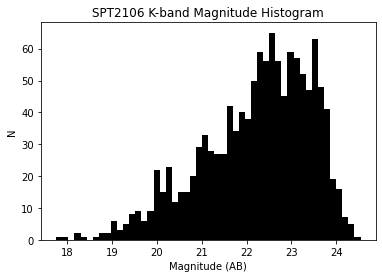

In [10]:
# Define cluster of interest
targetCluster = 'SPT2106'

# From targetCluster
# Select all galaxies (Star==0)
# That have a K-band flux (Ks_tot)
# With an image in each filter (totmask==0)
# And measurement using SExtractor (K_flag==0)
kFlux = phot_table.query('Cluster==@targetCluster and Star==0 and K_flag==0 and totmask==0')['Ks_tot'].dropna().values

# Calculate the magnitude of each galaxy, excluding those with negative flux
kMag = ABmag(kFlux[kFlux > 0], 25)

# Plot the histogram
fig = plt.figure()
plt.hist(kMag, bins=50, color='k')
plt.title('SPT2106 K-band Magnitude Histogram')
plt.xlabel('Magnitude (AB)')
plt.ylabel('N')
plt.show()

### 2) Histogram of SPT2106 redshifts
Using spectroscopic where available and photometric otherwise

In [ ]:
### GET CLUSTER REDSHIFT DATA ###

# Define cluster property of interest
targetProperty = 'Redshift'

# Find the value of targetProperty for targetCluster
clusterZ = cluster_table.query('cluster==@targetCluster')[targetProperty].values

## GET GALAXY REDSHIFT DATA

# Select the galaxies within targetCluster with spectroscopic redshifts
galSpecZ = phot_table.query('Cluster==@targetCluster and Star==0 and K_flag==0 and totmask==0')['zspec'].dropna().values

# Select the galaxies within targetCluster with photometric redshifts (but no spectroscopic)
galPhotZ = phot_table.query('Cluster==@targetCluster and Star==0 and K_flag==0 and totmask==0 and zspec.isnull()')['zphot'].dropna().values

# Information regarding excluded points
print('Number of excluded points (z>2): ', len(galSpecZ[galSpecZ > 2])+len(galPhotZ[galPhotZ > 2]))

# Plot the histogram
fig = plt.figure()
plt.hist(galSpecZ, bins=50, color='r', label='Spectroscopic z')
plt.hist(galPhotZ, bins=50, alpha=0.5, color='b', label='Photometric z')
plt.title('SPT2106 Redshift Histogram')
plt.axvline(clusterZ+0.08, c='k', linewidth=1, label='+- 0.08 Cluster z')
plt.axvline(clusterZ-0.08, c='k', linewidth=1,)
plt.xlabel('Redshift (z)')
plt.xlim(0,2)
plt.ylabel('N')
plt.legend(fontsize='large')
plt.show()

Number of excluded points (z>2):  59


### 3) Histogram of SPT2106 effective radius
Note: Effective radius is in units of arcseconds

In [ ]:
## GET SPT2106 GALAXY EFFECTIVE RADIUS DATA

## look at images for reasons why there are so many in the 0 bin. Are these stars?
galaxyRE = structMatchSPT2106_table.query('re > 0 and (0 < n < 6) and Fit_flag==3')['re']

# Information regarding excluded points
print('Number of excluded points (re>0.7): ', len(galaxyRE[galaxyRE > 0.7]))

# Plot the histogram
fig = plt.figure()
plt.hist(galaxyRE.values, bins=75, color='g')
plt.title('SPT2016 Effective Radius Histogram')
plt.xlabel('Effective Radius (pix)')
plt.xlim(0,0.7)
plt.ylabel('N')
plt.show()

### 4) SPT2106 K-band mag vs effective radius

In [ ]:
# GET SPT2106 GALAXY K-BAND FLUX DATA
galaxykflux = phot_table.query('Cluster==@targetCluster and Star==0 and K_flag==0 and totmask==0 and Ks_tot > 0')[['cPHOTID','Ks_tot']]

# GET SPT2106 GALAXY RE DATA
galaxyRE = structMatchSPT2106_table.query('re > 0')[['PHOTCATID', 're']]

# Modify PHOTCATID column to match that of photo.fits
galaxyRE.rename(columns = {'PHOTCATID':'cPHOTID'}, inplace = True)
galaxyRE.loc[:,'cPHOTID'] += int(1.03e8)

# Combine dataframe rows where cPHOTID is the same
matchingGalaxies = galaxykflux.merge(galaxyRE, on='cPHOTID')

# Plot K-band mag vs re
fig = plt.figure()
plt.scatter(ABmag(matchingGalaxies.Ks_tot.values, 25), matchingGalaxies.re.values, c='m')
plt.title('SPT2016 K-band Mag vs Effective Radius')
plt.xlabel('K-band Magnitude')
plt.ylabel('Effective Radius (arcsec)')
plt.show()

### 5) SPT2106 K-band mag vs $r_{\rm e}$
Sources that have a zspec or if not, have zphot within +/- 0.08 of the cluster redshift

In [ ]:
# GET SPT2106 GALAXY K-BAND FLUX DATA
galaxykflux_zspec = phot_table.query('Cluster==@targetCluster and Star==0 and K_flag==0 and totmask==0 and Ks_tot > 0 and (@clusterZ-0.02 < zspec.values < @clusterZ+0.02)')[['cPHOTID','Ks_tot']]
galaxykflux_zphot = phot_table.query('Cluster==@targetCluster and Star==0 and K_flag==0 and totmask==0 and Ks_tot > 0 and (@clusterZ-0.08 < zphot.values < @clusterZ+0.08)')[['cPHOTID','Ks_tot']]

# GET SPT2106 GALAXY RE DATA

# Combine dataframe rows where cPHOTID is the same
combinedGalaxies_zspec = galaxykflux_zspec.merge(galaxyRE, on='cPHOTID')
# Exclude zphot's where there is a zspec
combinedGalaxies_zphot = galaxykflux_zphot.merge(galaxyRE, on='cPHOTID').query('~cPHOTID.isin(@combinedGalaxies_zspec.cPHOTID)')

# Plot K-band mag vs re
fig = plt.figure()
plt.scatter(ABmag(combinedGalaxies_zspec.Ks_tot.values, 25), combinedGalaxies_zspec.re.values, c='c', label='Spectroscopic z')
plt.scatter(ABmag(combinedGalaxies_zphot.Ks_tot.values, 25), combinedGalaxies_zphot.re.values, c='y', label='Photometric z +- 0.08 cluster z')
plt.title('SPT2016 K-band Mag vs Effective Radius')
plt.xlabel('K-band Magnitude')
plt.ylabel('Effective Radius (arcsec)')
plt.legend(fontsize='large')
plt.show()

### 6) SPT2106 stellar mass vs $r_{\rm e}$
(Under the same conditions as #5)

In [ ]:
# GET SPT2106 GALAXY STELLAR MASS DATA
galaxymass_zspec = phot_table.query('Cluster==@targetCluster and Star==0 and K_flag==0 and totmask==0 and (@clusterZ-0.02 < zspec.values < @clusterZ+0.02)')[['cPHOTID','Mstellar']]
galaxymass_zphot = phot_table.query('Cluster==@targetCluster and Star==0 and K_flag==0 and totmask==0 and (@clusterZ-0.08 < zphot.values < @clusterZ+0.08)')[['cPHOTID','Mstellar']]

# Combine dataframe rows where cPHOTID is the same
combinedGalaxies_zspec = galaxymass_zspec.merge(galaxyRE, on='cPHOTID')
# Exclude zphot's where there is a zspec
combinedGalaxies_zphot = galaxymass_zphot.merge(galaxyRE, on='cPHOTID').query('~cPHOTID.isin(@combinedGalaxies_zspec.cPHOTID)')

# Plot K-band mag vs re
fig = plt.figure()
plt.scatter(np.log10(combinedGalaxies_zspec.Mstellar.values), combinedGalaxies_zspec.re.values, c='orange', label='Spectroscopic z')
plt.scatter(np.log10(combinedGalaxies_zphot.Mstellar.values), combinedGalaxies_zphot.re.values, c='brown', label='Photometric z +- 0.08 cluster z')
plt.title('SPT2016 Stellar Mass vs Effective Radius')
plt.xlabel('log(Stellar Mass/Msun)')
plt.ylabel('Effective Radius (arcsec)')
plt.legend(fontsize='large')
plt.show()